In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR

<class 'ModuleNotFoundError'>: The module 'scipy' is included in the Pyodide distribution, but it is not installed.
You can install it by calling:
  await micropip.install("scipy") in Python, or
  await pyodide.loadPackage("scipy") in JavaScript
See https://pyodide.org/en/stable/usage/loading-packages.html for more details.

In [5]:

df = pd.read_csv("stock_data.csv",parse_dates=True,index_col="Date")
df.head()



,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [7]:
df.drop(columns='Unnamed: 0')

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


<AxesSubplot:xlabel='Date'>

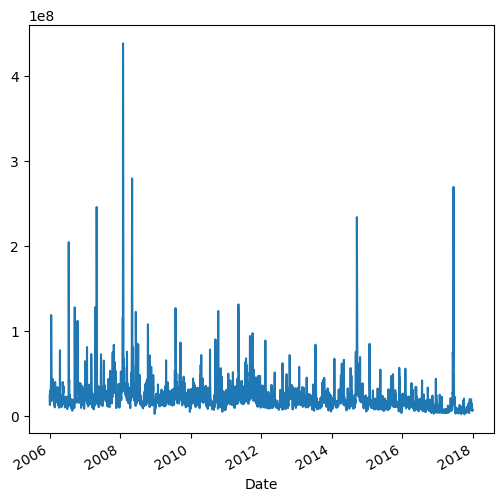

In [21]:
df ['Volume'].plot(figsize=(6,6))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

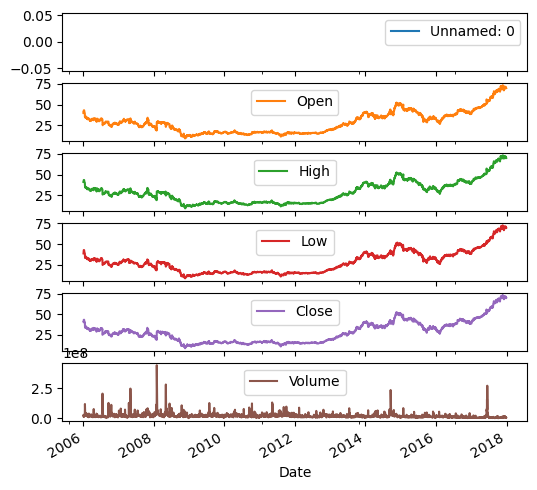

In [20]:
df.plot(subplots=True, figsize=(6,6))

<ipython-input-23-28a0bbe7b74c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df.resample("M").mean()


<BarContainer object of 24 artists>

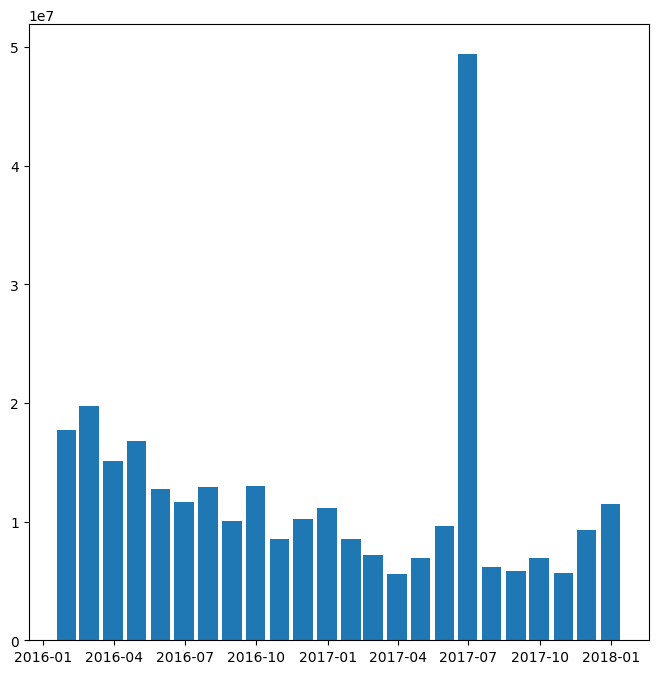

In [23]:
df_month = df.resample("M").mean()
# using subplot
fig, ax = plt.subplots(figsize=(8, 8))
# plotting bar graph
ax.bar(df_month['2016':].index,
df_month.loc['2016':, "Volume"],
width=25, align='center')


<AxesSubplot:xlabel='Date'>

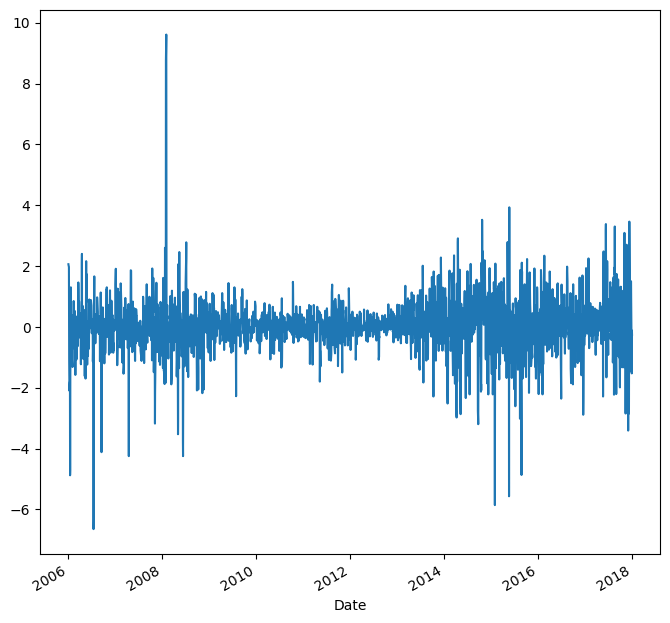

In [24]:
df.Low.diff(2).plot(figsize=(8, 8))



<AxesSubplot:xlabel='Date'>

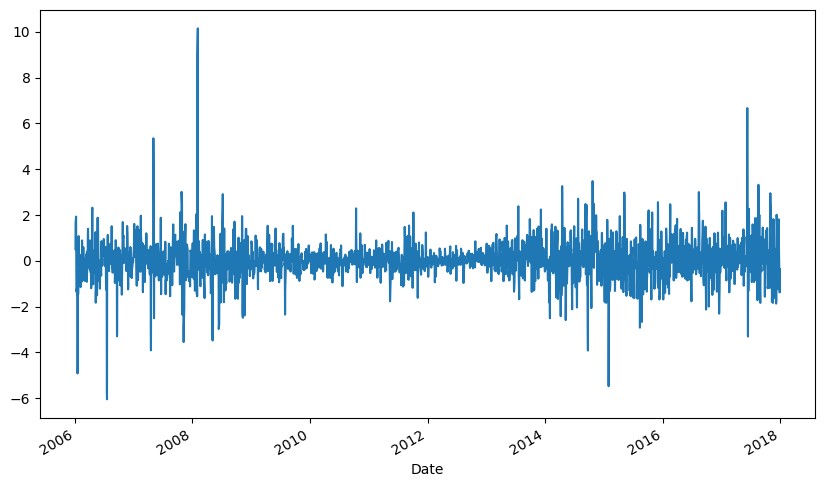

In [15]:
df.High.diff(2).plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

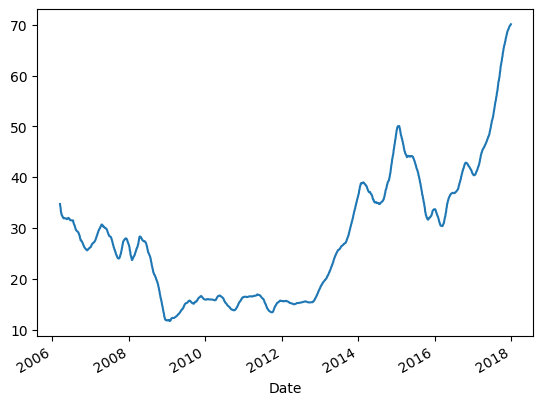

In [16]:
window_size = 50
rolling_mean = df['Open'].rolling\
(window_size).mean()
rolling_mean.plot()
